In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import torch
import torch
import torch.nn as nn
import torch.optim as optim

from config.default_config import DEFAULT_CONFIG
from data.dataloader import create_data_loaders
import numpy as np
from train import parse_args
from utils.helpers import set_seed, get_device


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap



In [2]:
config = DEFAULT_CONFIG

# Set random seed
set_seed(config["training"]["seed"])

# Get device
device = get_device()
print(f"Using device: {device}")

# Create data loaders
data = create_data_loaders(config)
train_loader = data["train_loader"]
val_loader = data["val_loader"]
test_loader = data["test_loader"]

Using device: cuda
 ---------------- Data Augmentation FINISHED ---------------- 
 ---------------- Dataset Concatenation FINISHED ---------------- 


Loading best trained RandomForest model...
Model loaded successfully.
Extracting features from dataloader...
Feature extraction complete.
Feature scaling (Standard Normalization) complete.
Applying PCA...
PCA transformation complete.


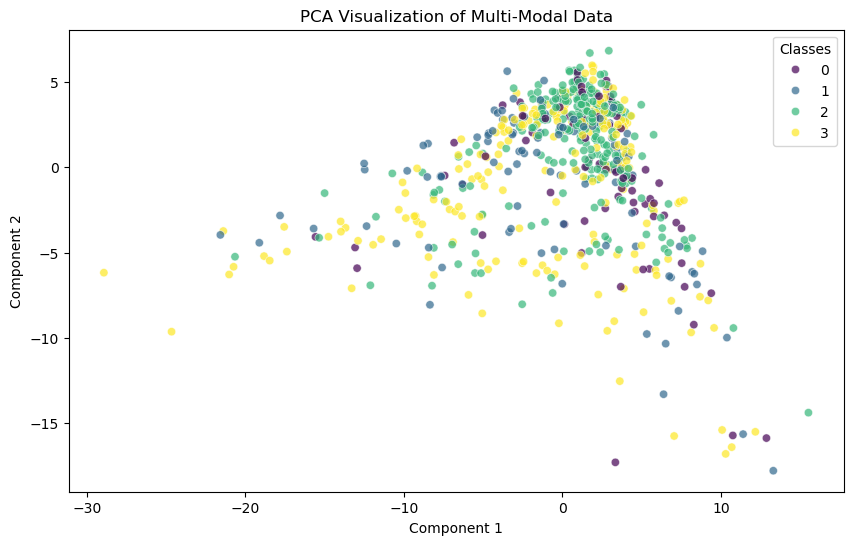

PCA plot displayed.
Applying TSNE...
TSNE transformation complete.


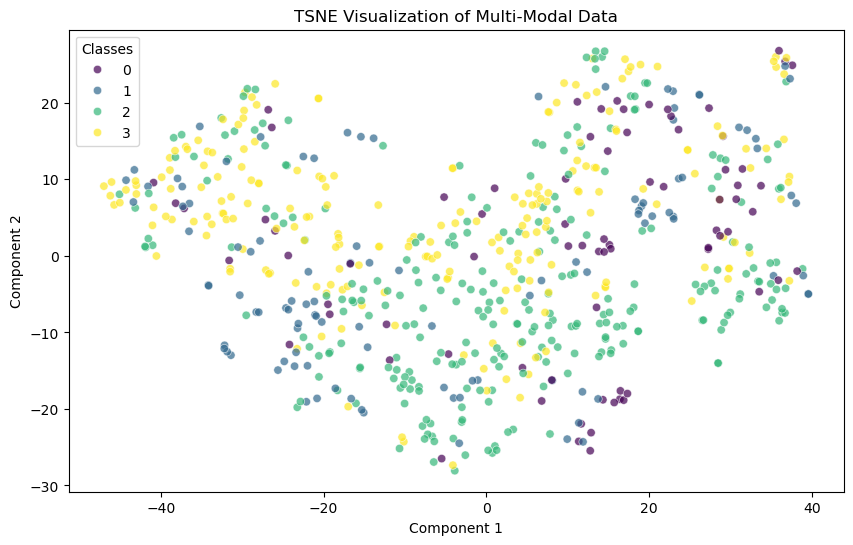

TSNE plot displayed.
Applying UMAP...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP transformation complete.


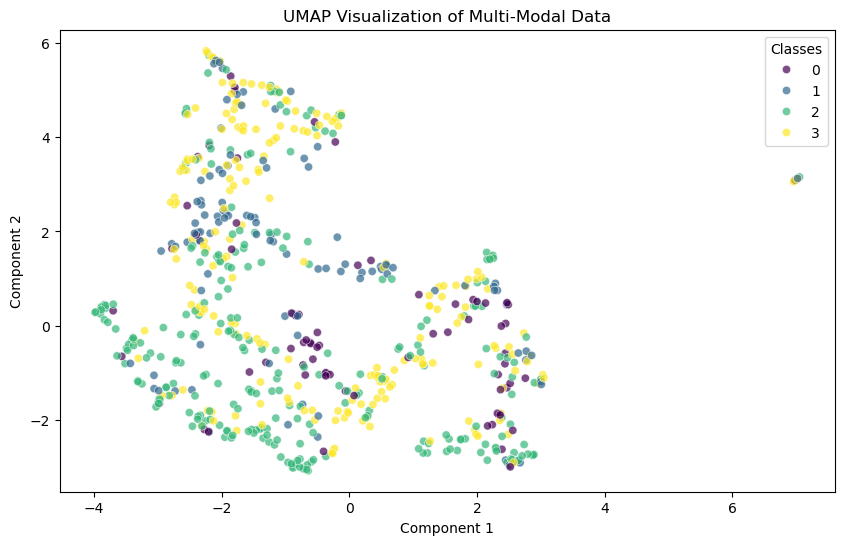

UMAP plot displayed.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

# Function to extract features and labels
def extract_features(dataloader, device='cpu'):
    print("Extracting features from dataloader...")
    features, labels = [], []
    with torch.no_grad():
        for _, multi_modal_features, target_labels in dataloader:
            multi_modal_features = multi_modal_features.cpu().numpy()
            features.append(multi_modal_features)
            labels.append(target_labels.cpu().numpy())
    
    X = np.vstack(features)
    y = np.hstack(labels)
    print("Feature extraction complete.")
    return X, y

# Load best trained RandomForest model
print("Loading best trained RandomForest model...")
best_rf_model = joblib.load("outputs/multi_modal_best_model.pkl")
print("Model loaded successfully.")

# Extract features from test dataset (assuming you have test_loader ready)
X, y = extract_features(test_loader)

# Standard normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Feature scaling (Standard Normalization) complete.")

# Perform dimensionality reduction methods
methods = {
    "PCA": PCA(n_components=2),
    "TSNE": TSNE(n_components=2, perplexity=30, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42)
}

for method_name, reducer in methods.items():
    print(f"Applying {method_name}...")
    X_reduced = reducer.fit_transform(X)
    print(f"{method_name} transformation complete.")
    
    # Plot visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette="viridis", alpha=0.7)
    plt.title(f"{method_name} Visualization of Multi-Modal Data")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Classes")
    plt.show()
    print(f"{method_name} plot displayed.")


Loading best trained RandomForest model...
Model loaded successfully.

Extracting features from dataloader...
Feature extraction complete.
Extracting features from dataloader...
Feature extraction complete.
Training and evaluating Logistic Regression...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1751
Precision: 0.1938
Recall: 0.1751
F1 Score: 0.0790



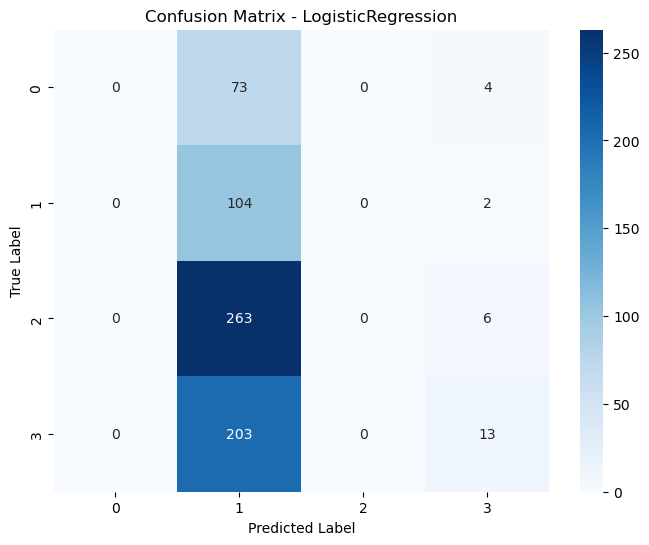

Training and evaluating SVM (RBF Kernel)...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1153
Precision: 0.0133
Recall: 0.1153
F1 Score: 0.0238



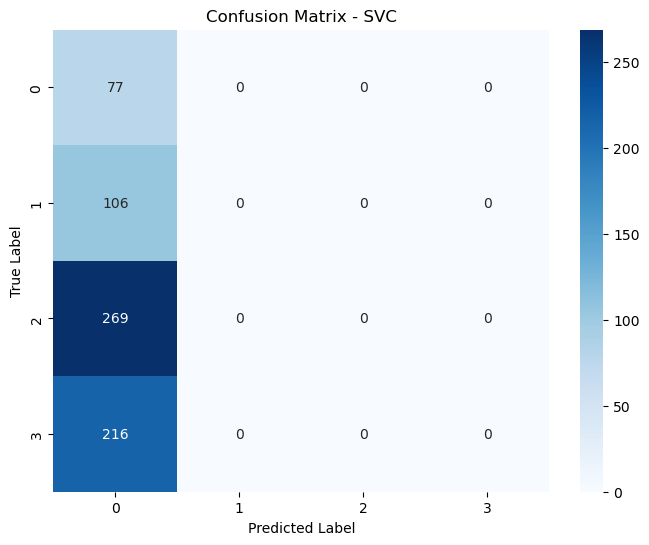

Training and evaluating K-Nearest Neighbors...
Accuracy: 0.1976
Precision: 0.3791
Recall: 0.1976
F1 Score: 0.1845



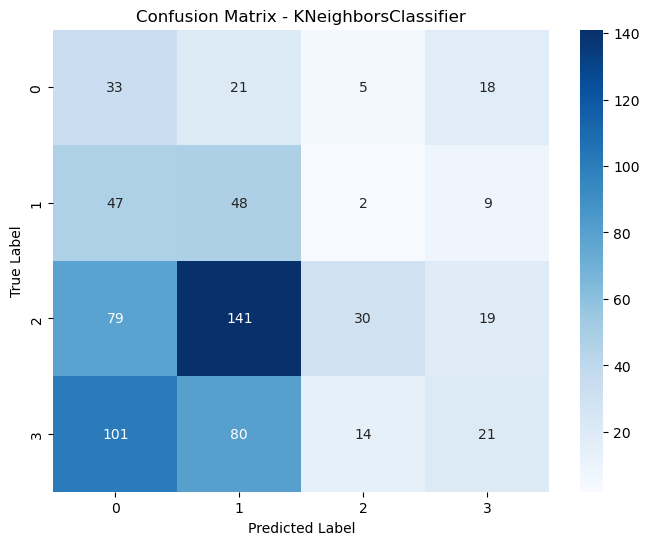

Training and evaluating Decision Tree...
Accuracy: 0.3039
Precision: 0.1486
Recall: 0.3039
F1 Score: 0.1775



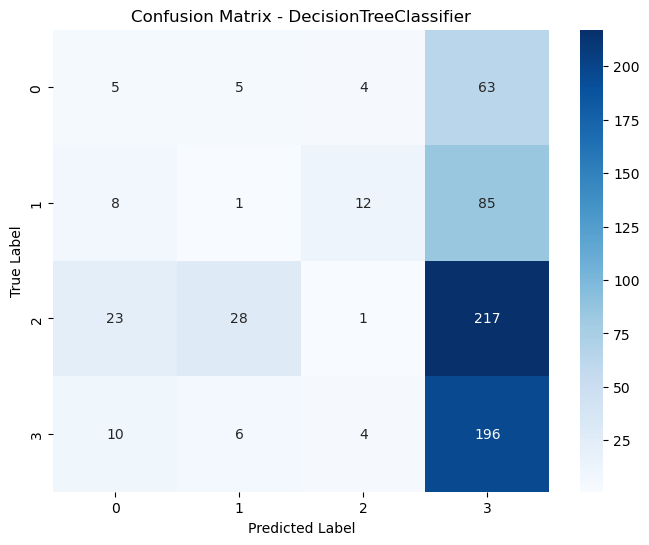

Training and evaluating Random Forest...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3234
Precision: 0.2063
Recall: 0.3234
F1 Score: 0.1620



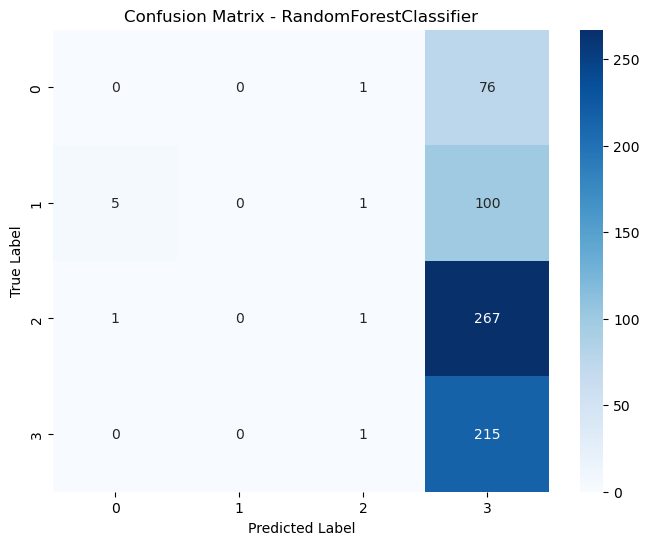

Training and evaluating Gradient Boosting...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3817
Precision: 0.3189
Recall: 0.3817
F1 Score: 0.3134



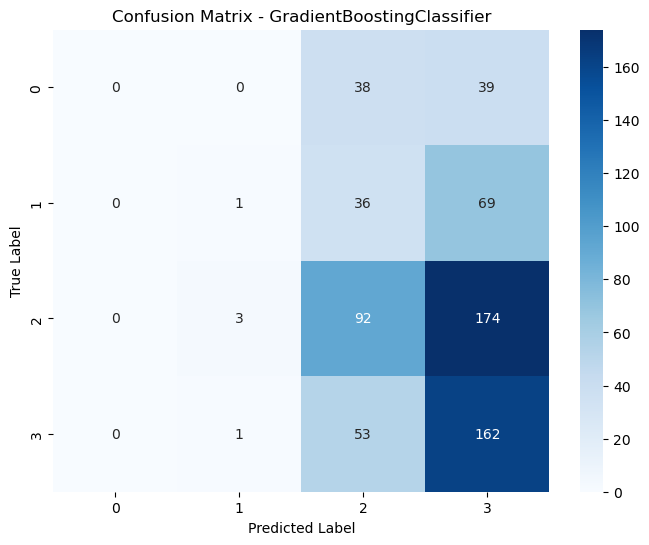

Training and evaluating AdaBoost...


c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4386
Precision: 0.4232
Recall: 0.4386
F1 Score: 0.3419



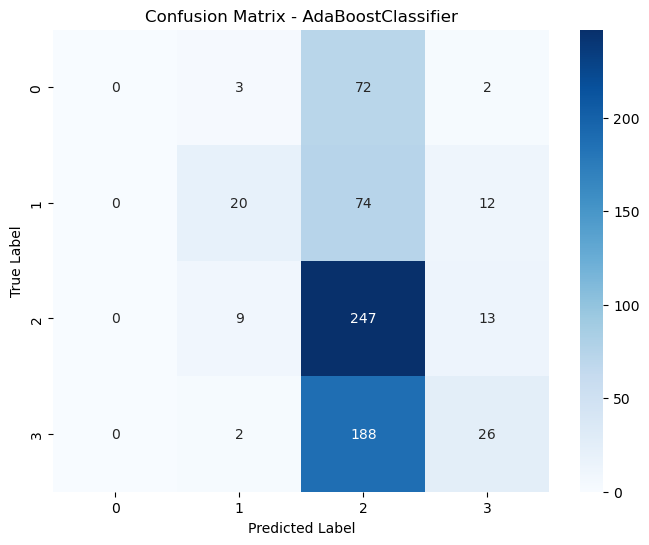

Training and evaluating Naive Bayes...
Accuracy: 0.3234
Precision: 0.1046
Recall: 0.3234
F1 Score: 0.1580



c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


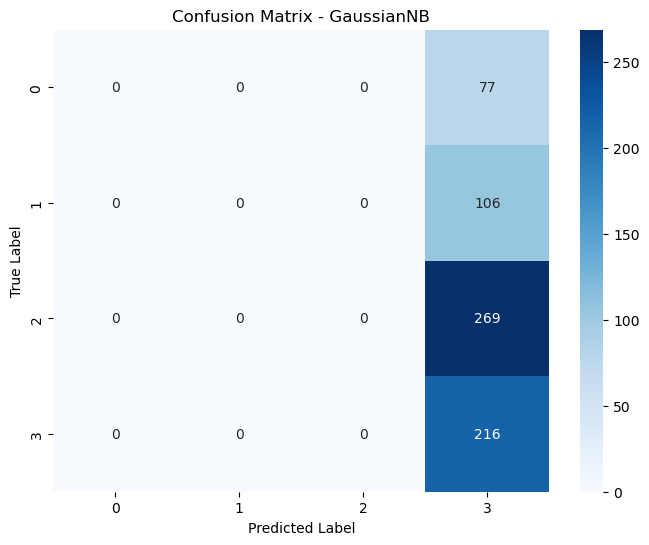

Training and evaluating LDA...
Accuracy: 0.1153
Precision: 0.0133
Recall: 0.1153
F1 Score: 0.0238



c:\Users\chris\anaconda3\envs\project_cv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


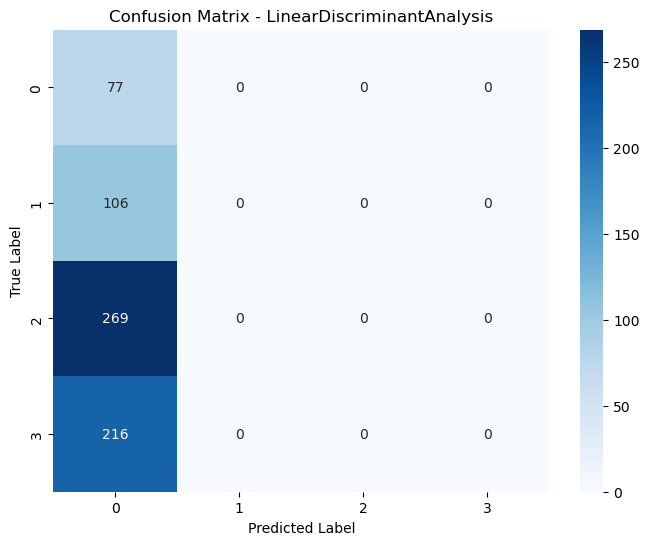

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {type(model).__name__}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Extract features from datasets
X_train, y_train = extract_features(train_loader)
X_test, y_test = extract_features(test_loader)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature scaling complete.\n")

# Balance training data with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(f"Training data balanced. Class distribution:\n{np.bincount(y_train_balanced)}\n")

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train_balanced, y_train_balanced)
    evaluate_model(model, X_test, y_test)
